Crime and Weather: Boston

In [40]:
import math
import csv
import statistics 
import argparse
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'scipy'

Create Dataframes from Data Files

In [3]:
crimeDF = pd.read_csv("bcrime.csv", encoding='windows-1254')
weatherDF = pd.read_csv("bweather.csv")

numofcrimes = len(crimeDF.index)
print("Total Crimes:", numofcrimes)

numofweather = len(weatherDF.index)
print("Weather Entries:", numofweather)

Total Crimes: 327820
Weather Entries: 3749


/var/folders/vw/n4w0v0212dd8fstj52fmk5c40000gn/T/ipykernel_38634/23205013.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  crimeDF = pd.read_csv("bcrime.csv", encoding='windows-1254')


Remove Unwanted Data and Display Working Dataframe

In [4]:
del crimeDF["INCIDENT_NUMBER"]
del crimeDF["UCR_PART"]
del crimeDF["OFFENSE_CODE"]
del crimeDF["DISTRICT"]
del crimeDF["REPORTING_AREA"]
del crimeDF["SHOOTING"]
del crimeDF["DAY_OF_WEEK"]
del crimeDF["HOUR"]
del crimeDF["Lat"]
del crimeDF["Long"]
del crimeDF["STREET"]

In [5]:
del weatherDF["High Dew Point (F)"]
del weatherDF["Low Dew Point (F)"]
del weatherDF["Avg Dew Point (F)"]
del weatherDF["High Humidity (%)"]
del weatherDF["Low Sea Level Press (in)"]
del weatherDF["High Visibility (mi)"]
del weatherDF["Avg Visibility (mi)"]
del weatherDF["Low Visibility (mi)"]
del weatherDF["Snowfall (in)"]
del weatherDF["Precip (in)"]
del weatherDF["Low Humidity (%)"]
del weatherDF["Avg Humidity (%)"]
del weatherDF["Avg Sea Level Press (in)"]
del weatherDF["High Sea Level Press (in)"]
#del weatherDF["High Temp (F)"]
del weatherDF["Low Temp (F)"]
del weatherDF["High Wind (mph)"]
del weatherDF["High Wind Gust (mph)"]

Print Heads of Weather and Crime Data Frames 

In [6]:
crimeDF['OCCURRED_ON_DATE'] = pd.to_datetime(crimeDF.OCCURRED_ON_DATE)
crimeDF['Date'] = pd.to_datetime(crimeDF['OCCURRED_ON_DATE'].dt.date)
crimeDF.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,Location,Date
0,Disorderly Conduct,DISTURBING THE PEACE,2018-10-03 20:13:00,2018,10,"(42.26260773, -71.12118637)",2018-10-03
1,Property Lost,PROPERTY - LOST,2018-08-30 20:00:00,2018,8,"(42.35211146, -71.13531147)",2018-08-30
2,Other,THREATS TO DO BODILY HARM,2018-10-03 19:20:00,2018,10,"(42.30812619, -71.07692974)",2018-10-03
3,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,2018-10-03 20:00:00,2018,10,"(42.35945371, -71.05964817)",2018-10-03
4,Aircraft,AIRCRAFT INCIDENTS,2018-10-03 20:49:00,2018,10,"(42.37525782, -71.02466343)",2018-10-03


In [7]:
weatherDF['Date'] = pd.to_datetime(dict(year=weatherDF.Year, month=weatherDF.Month, day=weatherDF.Day))
weatherDF.head()

,Year,Month,Day,High Temp (F),Avg Temp (F),Avg Wind (mph),Events,Date
0,2008,1,1,40,34,10,Both,2008-01-01
1,2008,1,2,33,22,15,Snow,2008-01-02
2,2008,1,3,14,11,17,None,2008-01-03
3,2008,1,4,32,20,12,None,2008-01-04
4,2008,1,5,42,35,9,None,2008-01-05


--------------

Merge Data Frames Based on Date and Complete Entries

In [8]:
mergedDF = pd.merge(weatherDF, crimeDF, how='outer', on='Date')
mergedDF = mergedDF.dropna(subset=['OFFENSE_DESCRIPTION'])
mergedDF = mergedDF.dropna(subset=['High Temp (F)'])
mergedDF['Year'] = mergedDF['Year'].astype(int)
mergedDF['Month'] = mergedDF['Month'].astype(int)
mergedDF['Day'] = mergedDF['Day'].astype(int)


del mergedDF["YEAR"]
del mergedDF["MONTH"]
#del mergedDF["Day"]

display(mergedDF)

,Year,Month,Day,High Temp (F),Avg Temp (F),Avg Wind (mph),Events,Date,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,Location
2722,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Property Lost,PROPERTY - LOST,2015-06-15 00:00:00,"(-1.00000000, -1.00000000)"
2723,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Harassment,HARASSMENT,2015-06-15 00:00:00,"(42.29109287, -71.06594539)"
2724,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-06-15 09:00:00,"(42.34283015, -71.07374670)"
2725,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Property Lost,PROPERTY - LOST,2015-06-15 00:00:00,"(42.28363434, -71.08281320)"
2726,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Property Lost,PROPERTY - LOST,2015-06-15 16:00:00,"(42.29037227, -71.06845477)"
...,...,...,...,...,...,...,...,...,...,...,...,...
280262,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Investigate Property,INVESTIGATE PROPERTY,2018-04-08 01:02:00,"(42.34391716, -71.08967541)"
280263,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Fire Related Reports,"FIRE REPORT - HOUSE, BUILDING, ETC.",2018-04-08 00:55:00,"(42.35095909, -71.07412780)"
280264,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Missing Person Located,MISSING PERSON - LOCATED,2018-04-08 00:23:00,"(42.26839985, -71.11127345)"
280265,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Missing Person Reported,MISSING PERSON,2018-04-08 00:23:00,"(42.26839985, -71.11127345)"


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Create Data Frames Based on Average Temperatue

In [9]:
hotDays = mergedDF[mergedDF['High Temp (F)'] > 80]
mildDays = mergedDF[(mergedDF['High Temp (F)'] >= 50) & (mergedDF['High Temp (F)'] <= 80)]
coldDays = mergedDF[mergedDF['High Temp (F)'] < 50]

numofweathercrimes = len(mergedDF.index)

In [10]:
display(hotDays)

,Year,Month,Day,High Temp (F),Avg Temp (F),Avg Wind (mph),Events,Date,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,Location
3748,2015,6,19,86.0,75.0,10.0,None,2015-06-19,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-06-19 08:00:00,"(42.29299523, -71.12115364)"
3749,2015,6,19,86.0,75.0,10.0,None,2015-06-19,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-06-19 09:00:00,"(42.30971857, -71.10429432)"
3750,2015,6,19,86.0,75.0,10.0,None,2015-06-19,Property Lost,PROPERTY - LOST,2015-06-19 01:00:00,"(42.36020464, -71.05620816)"
3751,2015,6,19,86.0,75.0,10.0,None,2015-06-19,Larceny,LARCENY THEFT OF BICYCLE,2015-06-19 09:00:00,"(42.35002485, -71.09646321)"
3752,2015,6,19,86.0,75.0,10.0,None,2015-06-19,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,2015-06-19 06:00:00,"(42.32795652, -71.10526297)"
...,...,...,...,...,...,...,...,...,...,...,...,...
231003,2017,9,27,86.0,76.0,9.0,None,2017-09-27,Larceny,LARCENY THEFT OF BICYCLE,2017-09-27 00:31:00,"(42.34396866, -71.10001300)"
231004,2017,9,27,86.0,76.0,9.0,None,2017-09-27,Verbal Disputes,VERBAL DISPUTE,2017-09-27 00:19:32,"(42.26983458, -71.10003437)"
231005,2017,9,27,86.0,76.0,9.0,None,2017-09-27,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,2017-09-27 00:13:00,"(42.32974270, -71.05826343)"
231006,2017,9,27,86.0,76.0,9.0,None,2017-09-27,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,2017-09-27 00:01:00,"(42.38291031, -71.01860585)"


In [11]:
ldf = hotDays

theft = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("theft", case=False)]
numoftheft = len(theft.index)

vandalism = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)

larceny = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("larceny", case=False)]
numoflarceny = len(larceny.index)

burglary = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)

property = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("property", case=False)]
numofproperty = len(property.index)

fire = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("fire", case=False)]
numoffire = len(fire.index)

numcrimeproph = numofburglary + numoflarceny + numoftheft + numofproperty + numofvandalism + numoffire

proppercenth = str(round(((numcrimeproph/numofweathercrimes)*100), 2))

print("Crimes Against Property on Hot Days:", numcrimeproph)
print("Percent of Crimes:", proppercenth)
print("Theft Crimes:", numoftheft)
print("Vadalism Crimes:", numofvandalism)
print("Larceny Crimes:", numoflarceny)
print("Burglary Crimes:", numofburglary)
print("Property Crimes:", numofproperty)
print("Fire Related Crimes:", numoffire)
print()

assault = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("assault", case=False)]
numofassault = len(assault.index)

manslaught = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("manslaughter", case=False)]
numofmanslaught = len(manslaught.index)

warrant = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("warrant", case=False)]
numofwarrant = len(warrant.index)

medical = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("medical", case=False)]
numofmedical = len(medical.index)

person = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("harassment", case=False)]
numofharass = len(harassment.index)

numcrimepersonh = numofassault + numofmanslaught + numofwarrant + numofmedical + numofperson + numofharass

peoplepercenth = str(round(((numcrimepersonh/numofweathercrimes)*100), 2))

print("Crimes Against People on Hot Days:", numcrimepersonh)
print("Percent of Crimes:", peoplepercenth)
print("Assault Crimes:", numofassault)
print("Manslaughter Crimes:", numofmanslaught)
print("Warrants:", numofwarrant)
print("Medical:", numofmedical)
print("Person Crimes:", numofperson)
print("Harassment Crimes:", numofharass)
print()

Violations = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("violation", case=False)]
numofvio = len(Violations.index)

threat = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("threat", case=False)]
numofthreat = len(threat.index)

other = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("other", case=False)]
numofother = len(other.index)

numcrimesocietyh = numofvio + numofthreat + numofother

societypercenth = str(round(((numcrimesocietyh/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Hot Days:", numcrimesocietyh)
print("Percent of Crimes:", societypercenth)
print("Violations:", numofvio)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

hotdaycrimetot = numcrimeproph + numcrimepersonh + numcrimesocietyh
print("Total Hot Day Crimes:", hotdaycrimetot)

print("Percent of Weather Crimes:", (str(round((hotdaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Hot Days: 23153
Percent of Crimes: 8.34
Theft Crimes: 4717
Vadalism Crimes: 2562
Larceny Crimes: 6120
Burglary Crimes: 1304
Property Crimes: 7780
Fire Related Crimes: 670

Crimes Against People on Hot Days: 17100
Percent of Crimes: 6.16
Assault Crimes: 3745
Manslaughter Crimes: 30
Warrants: 1747
Medical: 2864
Person Crimes: 8061
Harassment Crimes: 653

Crimes Against Society/Other on Hot Days: 5557
Percent of Crimes: 2.0
Violations: 902
Threats: 1431
Other: 3224

Total Hot Day Crimes: 45810
Percent of Weather Crimes: 16.51


In [12]:
display(mildDays)

,Year,Month,Day,High Temp (F),Avg Temp (F),Avg Wind (mph),Events,Date,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,Location
2722,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Property Lost,PROPERTY - LOST,2015-06-15 00:00:00,"(-1.00000000, -1.00000000)"
2723,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Harassment,HARASSMENT,2015-06-15 00:00:00,"(42.29109287, -71.06594539)"
2724,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-06-15 09:00:00,"(42.34283015, -71.07374670)"
2725,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Property Lost,PROPERTY - LOST,2015-06-15 00:00:00,"(42.28363434, -71.08281320)"
2726,2015,6,15,63.0,59.0,9.0,Rain,2015-06-15,Property Lost,PROPERTY - LOST,2015-06-15 16:00:00,"(42.29037227, -71.06845477)"
...,...,...,...,...,...,...,...,...,...,...,...,...
279247,2018,4,4,58.0,49.0,13.0,Rain,2018-04-04,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,2018-04-04 01:12:00,"(42.30569111, -71.06164783)"
279248,2018,4,4,58.0,49.0,13.0,Rain,2018-04-04,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,2018-04-04 00:26:00,"(42.27796370, -71.09246318)"
279249,2018,4,4,58.0,49.0,13.0,Rain,2018-04-04,Violations,VAL - OPERATING AFTER REV/SUSP.,2018-04-04 00:27:24,"(42.34950783, -71.07949866)"
279250,2018,4,4,58.0,49.0,13.0,Rain,2018-04-04,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,2018-04-04 00:10:00,"(42.25992567, -71.13095630)"


In [13]:
ldf = mildDays

theft = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("theft", case=False)]
numoftheft = len(theft.index)

vandalism = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)

larceny = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("larceny", case=False)]
numoflarceny = len(larceny.index)

burglary = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)

property = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("property", case=False)]
numofproperty = len(property.index)

fire = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("fire", case=False)]
numoffire = len(fire.index)

numcrimepropm = numofburglary + numoflarceny + numoftheft + numofproperty + numofvandalism + numoffire

proppercentm = str(round(((numcrimepropm/numofweathercrimes)*100), 2))

print("Crimes Against Property on Mild Days:", numcrimepropm)
print("Percent of Crimes:", proppercentm)
print("Theft Crimes:", numoftheft)
print("Vadalism Crimes:", numofvandalism)
print("Larceny Crimes:", numoflarceny)
print("Burglary Crimes:", numofburglary)
print("Property Crimes:", numofproperty)
print("Fire Related Crimes:", numoffire)
print()

assault = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("assault", case=False)]
numofassault = len(assault.index)

manslaught = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("manslaughter", case=False)]
numofmanslaught = len(manslaught.index)

warrant = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("warrant", case=False)]
numofwarrant = len(warrant.index)

medical = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("medical", case=False)]
numofmedical = len(medical.index)

person = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("harassment", case=False)]
numofharass = len(harassment.index)

numcrimepersonm = numofassault + numofmanslaught + numofwarrant + numofmedical + numofperson + numofharass

peoplepercentm = str(round(((numcrimepersonm/numofweathercrimes)*100), 2))

print("Crimes Against People on Mild Days:", numcrimepersonm)
print("Percent of Crimes:", peoplepercentm)
print("Assault Crimes:", numofassault)
print("Manslaughter Crimes:", numofmanslaught)
print("Warrants:", numofwarrant)
print("Medical:", numofmedical)
print("Person Crimes:", numofperson)
print("Harassment Crimes:", numofharass)
print()

Violations = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("violation", case=False)]
numofvio = len(Violations.index)

threat = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("threat", case=False)]
numofthreat = len(threat.index)

other = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("other", case=False)]
numofother = len(other.index)

numcrimesocietym = numofvio + numofthreat + numofother

societypercentm = str(round(((numcrimesocietym/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Mild Days:", numcrimesocietym)
print("Percent of Crimes:", societypercentm)
print("Violations:", numofvio)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

milddaycrimetot = numcrimepropm + numcrimepersonm + numcrimesocietym

print("Total Mild Day Crimes:", milddaycrimetot)
print("Percent of Weather Crimes:", (str(round((milddaycrimetot/numofweathercrimes)*100,2))))


Crimes Against Property on Mild Days: 63889
Percent of Crimes: 23.02
Theft Crimes: 12654
Vadalism Crimes: 7072
Larceny Crimes: 16909
Burglary Crimes: 3544
Property Crimes: 22053
Fire Related Crimes: 1657

Crimes Against People on Mild Days: 49722
Percent of Crimes: 17.91
Assault Crimes: 10749
Manslaughter Crimes: 83
Warrants: 4441
Medical: 8571
Person Crimes: 23968
Harassment Crimes: 1910

Crimes Against Society/Other on Mild Days: 15963
Percent of Crimes: 5.75
Violations: 2697
Threats: 4170
Other: 9096

Total Mild Day Crimes: 129574
Percent of Weather Crimes: 46.69


In [14]:
display(coldDays)

,Year,Month,Day,High Temp (F),Avg Temp (F),Avg Wind (mph),Events,Date,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,Location
36649,2015,10,18,47.0,40.0,11.0,None,2015-10-18,Vandalism,VANDALISM,2015-10-18 00:00:00,"(42.34128751, -71.05467933)"
36650,2015,10,18,47.0,40.0,11.0,None,2015-10-18,Larceny,LARCENY ALL OTHERS,2015-10-18 00:00:00,"(42.35125902, -71.06009371)"
36651,2015,10,18,47.0,40.0,11.0,None,2015-10-18,Other,THREATS TO DO BODILY HARM,2015-10-18 00:01:00,"(42.30956305, -71.08990197)"
36652,2015,10,18,47.0,40.0,11.0,None,2015-10-18,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,2015-10-18 15:30:00,"(42.34539406, -71.07380247)"
36653,2015,10,18,47.0,40.0,11.0,None,2015-10-18,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-10-18 07:51:00,"(42.28020820, -71.17087959)"
...,...,...,...,...,...,...,...,...,...,...,...,...
280262,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Investigate Property,INVESTIGATE PROPERTY,2018-04-08 01:02:00,"(42.34391716, -71.08967541)"
280263,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Fire Related Reports,"FIRE REPORT - HOUSE, BUILDING, ETC.",2018-04-08 00:55:00,"(42.35095909, -71.07412780)"
280264,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Missing Person Located,MISSING PERSON - LOCATED,2018-04-08 00:23:00,"(42.26839985, -71.11127345)"
280265,2018,4,8,42.0,37.0,13.0,None,2018-04-08,Missing Person Reported,MISSING PERSON,2018-04-08 00:23:00,"(42.26839985, -71.11127345)"


In [15]:
ldf = coldDays

theft = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("theft", case=False)]
numoftheft = len(theft.index)

vandalism = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)

larceny = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("larceny", case=False)]
numoflarceny = len(larceny.index)

burglary = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)

property = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("property", case=False)]
numofproperty = len(property.index)

fire = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("fire", case=False)]
numoffire = len(fire.index)

numcrimepropc = numofburglary + numoflarceny + numoftheft + numofproperty + numofvandalism + numoffire

proppercentc = str(round(((numcrimepropc/numofweathercrimes)*100), 2))

print("Crimes Against Property on Cold Days:", numcrimepropc)
print("Percent of Crimes:", proppercentc)
print("Theft Crimes:", numoftheft)
print("Vadalism Crimes:", numofvandalism)
print("Larceny Crimes:", numoflarceny)
print("Burglary Crimes:", numofburglary)
print("Property Crimes:", numofproperty)
print("Fire Related Crimes:", numoffire)
print()


assault = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("assault", case=False)]
numofassault = len(assault.index)

manslaught = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("manslaughter", case=False)]
numofmanslaught = len(manslaught.index)

warrant = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("warrant", case=False)]
numofwarrant = len(warrant.index)

medical = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("medical", case=False)]
numofmedical = len(medical.index)

person = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("harassment", case=False)]
numofharass = len(harassment.index)

numcrimepersonc = numofassault + numofmanslaught + numofwarrant + numofmedical + numofperson + numofharass

peoplepercentc = str(round(((numcrimepersonc/numofweathercrimes)*100), 2))

print("Crimes Against People on Cold Days:", numcrimepersonc)
print("Percent of Crimes:", peoplepercentc)
print("Assault Crimes:", numofassault)
print("Manslaughter Crimes:", numofmanslaught)
print("Warrants:", numofwarrant)
print("Medical:", numofmedical)
print("Person Crimes:", numofperson)
print("Harassment Crimes:", numofharass)
print()


Violations = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("violation", case=False)]
numofvio = len(Violations.index)

threat = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("threat", case=False)]
numofthreat = len(threat.index)

other = ldf.loc[ldf['OFFENSE_DESCRIPTION'].str.contains("other", case=False)]
numofother = len(other.index)

numcrimesocietyc = numofvio + numofthreat + numofother

societypercentc = str(round(((numcrimesocietyc/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Cold Days:", numcrimesocietyc)
print("Percent of Crimes:", societypercentc)
print("Violations:", numofvio)
print("Threats:", numofthreat)
print("Other:", numofother)
print()


colddaycrimetot = numcrimepropc + numcrimepersonc + numcrimesocietyc
print("Total Cold Day Crimes:", colddaycrimetot)

print("Percent of Weather Crimes:", (str(round((colddaycrimetot/numofweathercrimes)*100,2))))


Crimes Against Property on Cold Days: 35253
Percent of Crimes: 12.7
Theft Crimes: 6317
Vadalism Crimes: 3750
Larceny Crimes: 9023
Burglary Crimes: 1804
Property Crimes: 13385
Fire Related Crimes: 974

Crimes Against People on Cold Days: 29287
Percent of Crimes: 10.55
Assault Crimes: 5904
Manslaughter Crimes: 37
Warrants: 2438
Medical: 5584
Person Crimes: 14253
Harassment Crimes: 1071

Crimes Against Society/Other on Cold Days: 9312
Percent of Crimes: 3.36
Violations: 1694
Threats: 2254
Other: 5364

Total Cold Day Crimes: 73852
Percent of Weather Crimes: 26.61


In [16]:
totweatherprop = numcrimeproph + numcrimepropm + numcrimepropc
totweatherperson = numcrimepersonh + numcrimepersonm + numcrimepersonc
totweathersociety = numcrimesocietyh + numcrimesocietym + numcrimesocietyc

hotProb = hotdaycrimetot/numofweathercrimes
mildProb = milddaycrimetot/numofweathercrimes
coldProb = colddaycrimetot/numofweathercrimes

propProb = totweatherprop/numofweathercrimes
peopleProb = totweatherperson/numofweathercrimes
societyProb = totweathersociety/numofweathercrimes


bayhprop = (numcrimeproph)/(hotdaycrimetot)
bayhpeople = (numcrimepersonh)/(hotdaycrimetot)
bayhsociety = (numcrimesocietyh)/(hotdaycrimetot)

baymprop = (numcrimepropm)/(milddaycrimetot)
baympeople = (numcrimepersonm)/(milddaycrimetot)
baymsociety = (numcrimesocietym)/(milddaycrimetot)

baycprop = (numcrimepropc)/(colddaycrimetot)
baycpeople = (numcrimepersonc)/(colddaycrimetot)
baycsociety = (numcrimesocietyc)/(colddaycrimetot)


#probhotprop = (()/())

print("Property Crimes: ", (str(round((totweatherprop/numofweathercrimes)*100,2))))
print("People Crimes: ", (str(round((totweatherperson/numofweathercrimes)*100,2))))
print("Society Crimes: ", (str(round((totweathersociety/numofweathercrimes)*100,2))))
print("Bayes' Theroem:")
print("Given a Hot Day, Probability of Property Crime Occurring: ", (str(round(bayhprop*100,2))))
print("Given a Hot Day, Probability of People Crime Occurring: ", (str(round(bayhpeople*100,2))))
print("Given a Hot Day, Probability of Society Crime Occurring: ", (str(round(bayhsociety*100,2))))
print("Given a Mild Day, Probability of Property Crime Occurring: ", (str(round(baymprop*100,2))))
print("Given a Mild Day, Probability of People Crime Occurring: ", (str(round(baympeople*100,2))))
print("Given a Mild Day, Probability of Society Crime Occurring: ", (str(round(baymsociety*100,2))))
print("Given a Cold Day, Probability of Property Crime Occurring: ", (str(round(baycprop*100,2))))
print("Given a Cold Day, Probability of People Crime Occurring: ", (str(round(baycpeople*100,2))))
print("Given a Cold Day, Probability of Society Crime Occurring: ", (str(round(baycsociety*100,2))))

Property Crimes:  44.06
People Crimes:  34.63
Society Crimes:  11.11
Bayes' Theroem:
Given a Hot Day, Probability of Property Crime Occurring:  50.54
Given a Hot Day, Probability of People Crime Occurring:  37.33
Given a Hot Day, Probability of Society Crime Occurring:  12.13
Given a Mild Day, Probability of Property Crime Occurring:  49.31
Given a Mild Day, Probability of People Crime Occurring:  38.37
Given a Mild Day, Probability of Society Crime Occurring:  12.32
Given a Cold Day, Probability of Property Crime Occurring:  47.73
Given a Cold Day, Probability of People Crime Occurring:  39.66
Given a Cold Day, Probability of Society Crime Occurring:  12.61


-----------------------

Crime Occurrences per Month

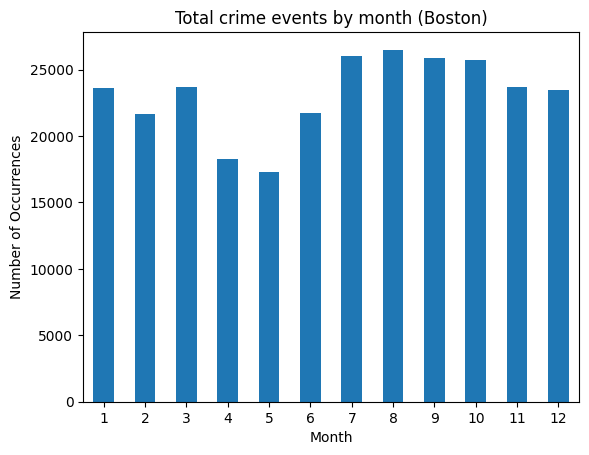

In [17]:
ax = mergedDF.groupby("Month").size().plot(kind = "bar", title= "Total crime events by month (Boston)")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

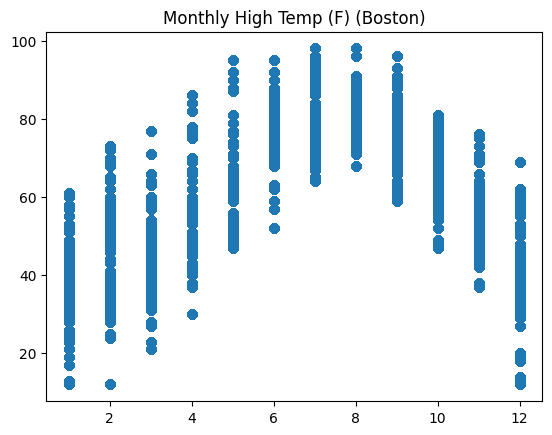

In [18]:
plt.scatter(mergedDF["Month"], mergedDF["High Temp (F)"])
plt.title("Monthly High Temp (F) (Boston)")
plt.show()

Crime Occurences per Year

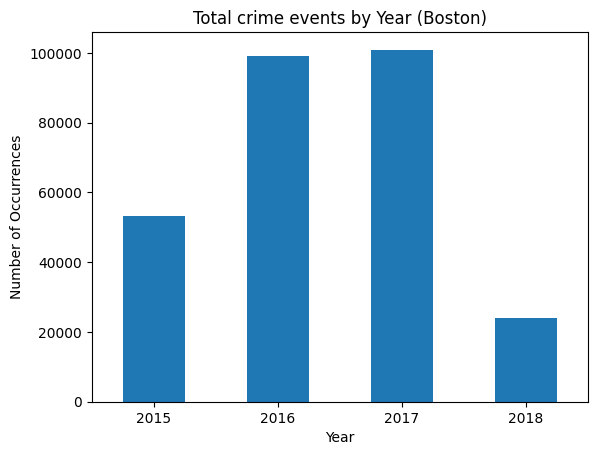

In [19]:
ax = mergedDF.groupby("Year").size().plot(kind = "bar", title= "Total crime events by Year (Boston)")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

Yearly Temperature 

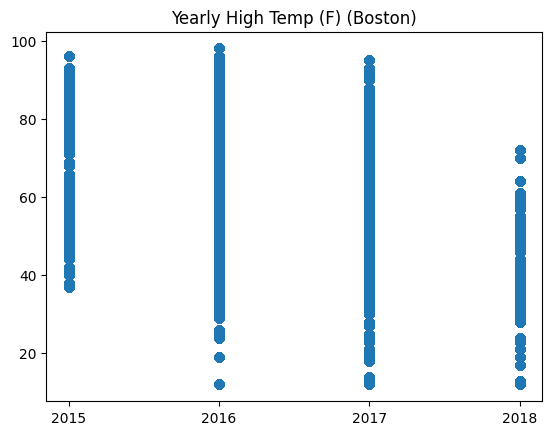

In [20]:
plt.scatter(mergedDF["Year"], mergedDF["High Temp (F)"])
plt.title("Yearly High Temp (F) (Boston)")
plt.xticks(np.arange(min(mergedDF["Year"]),max(mergedDF["Year"])+1, 1.0))
plt.show()

Temperature of Weather Events 

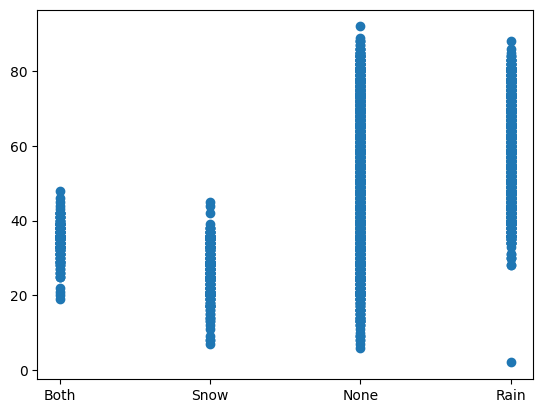

In [21]:
plt.scatter(weatherDF["Events"], weatherDF["Avg Temp (F)"])
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Crime Types and Classification (work in progress)

Motor Vehicle Accident Response              38134
Larceny                                      26670
Medical Assistance                           24226
Investigate Person                           19176
Other                                        18612
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64


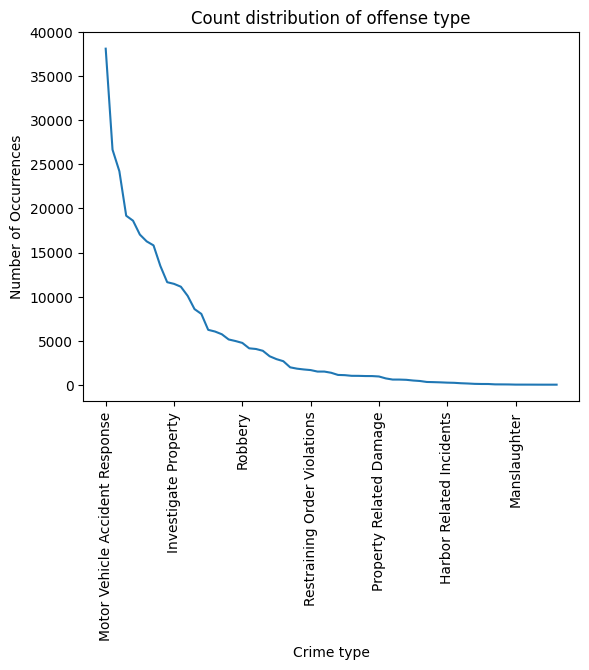

In [22]:
offenseType =(crimeDF["OFFENSE_CODE_GROUP"].value_counts())
print(offenseType)
crimeDF.shape
ax = offenseType.plot(title="Count distribution of offense type")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

Crime Occurances by Type (working on classification of "Type")

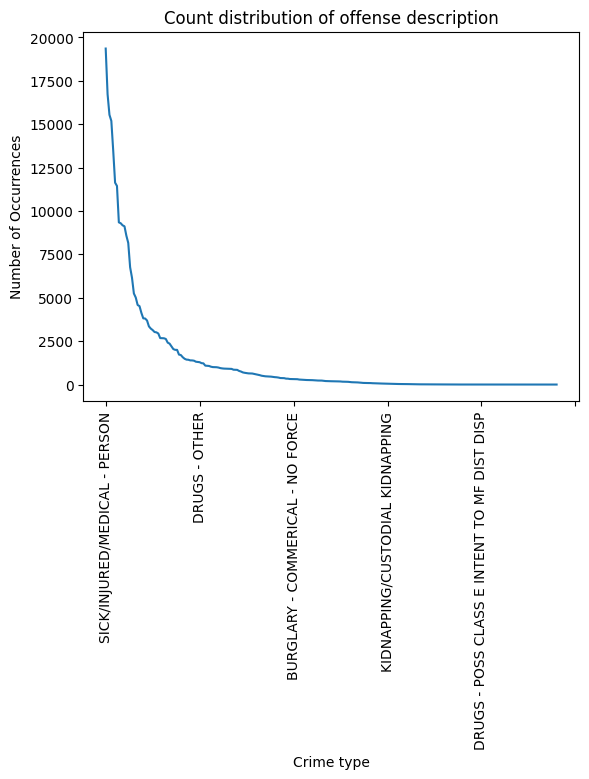

In [23]:
res = crimeDF[~crimeDF['OFFENSE_DESCRIPTION'].isin(offenseType[offenseType < 1000].index)]

# print(res)
ax = (res["OFFENSE_DESCRIPTION"].value_counts()).plot(title="Count distribution of offense description")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This section looks to find the best representing column for crime types 

------

Crimes Against Property (OFFENSE_DESCRIPTION COLUMN)

In [24]:
theft = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("theft", case=False)]
numoftheft = len(theft.index)
print("Theft Crimes:", numoftheft)

vandalism = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)
print("Vadalism Crimes:", numofvandalism)

larceny = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("larceny", case=False)]
numoflarceny = len(larceny.index)
print("Larceny Crimes:", numoflarceny)

burglary = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)
print("Burglary Crimes:", numofburglary)

property = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("property", case=False)]
numofproperty = len(property.index)
print("Property Crimes:", numofproperty)

fire = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("fire", case=False)]
numoffire = len(fire.index)
print("Fire Related Crimes:", numoffire)

numcrimeprop = numofburglary + numoflarceny + numoftheft + numofproperty + numofvandalism + numoffire
print("Crimes Against Property:", numcrimeprop)

proppercent = (numcrimeprop/numofcrimes)
print("Percent of Crimes:", proppercent*100)

Theft Crimes: 27740
Vadalism Crimes: 15542
Larceny Crimes: 37790
Burglary Crimes: 7542
Property Crimes: 51506
Fire Related Crimes: 3868
Crimes Against Property: 143988
Percent of Crimes: 43.922884509791956


Crimes Against People (OFFENSE_DESCRIPTION COLUMN)

In [25]:
assault = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("assault", case=False)]
numofassault = len(assault.index)
print("Assault Crimes:", numofassault)

manslaught = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("manslaughter", case=False)]
numofmanslaught = len(manslaught.index)
print("Manslaughter Crimes:", numofmanslaught)

warrant = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("warrant", case=False)]
numofwarrant = len(warrant.index)
print("Warrants:", numofwarrant)

medical = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("medical", case=False)]
numofmedical = len(medical.index)
print("Medical:", numofmedical)

person = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("person", case=False)]
numofperson = len(person.index)
print("Person Crimes:", numofperson)

harassment = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("harassment", case=False)]
numofharass = len(harassment.index)
print("Harassment Crimes:", numofharass)

numcrimeperson = numofassault + numofmanslaught + numofwarrant + numofmedical + numofperson + numofharass
print("Crimes Against People:", numcrimeperson)

peoplepercent = (numcrimeperson/numofcrimes)
print("Percent of Crimes:", peoplepercent*100)

Assault Crimes: 24476
Manslaughter Crimes: 173
Warrants: 9560
Medical: 20798
Person Crimes: 55145
Harassment Crimes: 4263
Crimes Against People: 114415
Percent of Crimes: 34.901775364529314


Crimes Against Society (OFFENSE_DESCRIPTION COLUMN)

In [26]:
Violations = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("violation", case=False)]
numofvio = len(Violations.index)
print("Violations:", numofvio)

threat = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("threat", case=False)]
numofthreat = len(threat.index)
print("Threats:", numofthreat)

other = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("other", case=False)]
numofother = len(other.index)
print("Other:", numofother)

numcrimesociety = numofvio + numofthreat + numofother
print("Crimes Against Society/Other:", numcrimesociety)

societypercent = (numcrimesociety/numofcrimes)
print("Percent of Crimes:", societypercent*100)

Violations: 5996
Threats: 9425
Other: 20893
Crimes Against Society/Other: 36314
Percent of Crimes: 11.077420535659813


Missing Crimes (OFFENSE_DESCRIPTION COLUMN)

In [27]:
numofmissing = numofcrimes - (numcrimeprop + numcrimeperson + numcrimesociety)
print("Number Missing:", numofmissing)

missingpercent = (numofmissing/numofcrimes)
print("Percent of Crimes:", missingpercent*100)

Number Missing: 33103
Percent of Crimes: 10.097919590018913


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Crimes Against Property (OFFENSE_CODE_GROUP COLUMN)

In [28]:
theft1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("theft", case=False)]
numoftheft1 = len(theft1.index)
print("Theft Crimes:", numoftheft1)

vandalism1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("vandalism", case=False)]
numofvandalism1 = len(vandalism1.index)
print("Vadalism Crimes:", numofvandalism1)

larceny1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("larceny", case=False)]
numoflarceny1 = len(larceny1.index)
print("Larceny Crimes:", numoflarceny1)

burglary1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("burglary", case=False)]
numofburglary1 = len(burglary1.index)
print("Burglary Crimes:", numofburglary1)

fire1 = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("fire", case=False)]
numoffire1 = len(fire1.index)
print("Fire Related Crimes:", numoffire1)

property1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("property", case=False)]
numofproperty1 = len(property1.index)
print("Property Crimes:", numofproperty1)

numcrimeprop1 = numofburglary1 + numoflarceny1 + numoftheft1 + numofproperty1 + numofvandalism1 + numoffire1
print("Crimes Against Property:", numcrimeprop1)

proppercent1 = (numcrimeprop1/numofcrimes)
print("Percent of Crimes:", proppercent1*100)

Theft Crimes: 6036
Vadalism Crimes: 15810
Larceny Crimes: 37790
Burglary Crimes: 7551
Fire Related Crimes: 3868
Property Crimes: 27993
Crimes Against Property: 99048
Percent of Crimes: 30.214141907144164


Crimes Against People (OFFENSE_CODE_GROUP COLUMN)

In [29]:
assault1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("assault", case=False)]
numofassault1 = len(assault1.index)
print("Assault Crimes:", numofassault1)

manslaught1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("manslaughter", case=False)]
numofmanslaught1 = len(manslaught1.index)
print("Manslaughter Crimes:", numofmanslaught1)

warrant1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("warrant", case=False)]
numofwarrant1 = len(warrant1.index)
print("Warrants:", numofwarrant1)

medical1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("medical", case=False)]
numofmedical1 = len(medical1.index)
print("Medical:", numofmedical1)

person1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("person", case=False)]
numofperson1 = len(person1.index)
print("Person Crimes:", numofperson1)

harassment1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("harassment", case=False)]
numofharass1 = len(harassment1.index)
print("Harassment Crimes:", numofharass1)

numcrimeperson1 = numofassault1 + numofmanslaught1 + numofwarrant1 + numofmedical1 + numofperson1 + numofharass1
print("Crimes Against People:", numcrimeperson1)

peoplepercent1 = (numcrimeperson1/numofcrimes)
print("Percent of Crimes:", peoplepercent1*100)

Assault Crimes: 24296
Manslaughter Crimes: 9
Warrants: 9560
Medical: 24226
Person Crimes: 28160
Harassment Crimes: 4263
Crimes Against People: 90514
Percent of Crimes: 27.610884021719233


Crimes Against Society (OFFENSE_CODE_GROUP COLUMN)

In [30]:
Violations1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("violation", case=False)]
numofvio1 = len(Violations1.index)
print("Violations:", numofvio1)

threat1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("threat", case=False)]
numofthreat1 = len(threat1.index)
print("Threats:", numofthreat1)

other1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("other", case=False)]
numofother1 = len(other1.index)
print("Other:", numofother1)

numcrimesociety1 = numofvio1 + numofthreat1 + numofother1
print("Crimes Against Society/Other:", numcrimesociety1)

societypercent1 = (numcrimesociety1/numofcrimes)
print("Percent of Crimes:", societypercent1*100)

Violations: 30553
Threats: 2
Other: 19085
Crimes Against Society/Other: 49640
Percent of Crimes: 15.142456225977671


In [31]:
numofmissing1 = numofcrimes - (numcrimeprop1 + numcrimeperson1 + numcrimesociety1)
print("Number Missing:", numofmissing1)

missingpercent1 = (numofmissing1/numofcrimes)
print("Percent of Crimes:", missingpercent1*100)

Number Missing: 88618
Percent of Crimes: 27.032517845158928


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

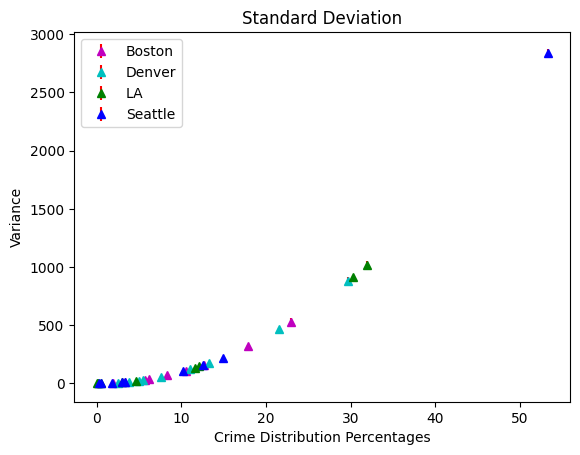

In [69]:
bostonl = np.array([8.34, 23.02, 12.7, 6.16, 17.91, 10.55, 2.0, 5.75, 3.36])
by = np.power(bostonl,2)

denverl = np.array([21.598, 29.742, 13.223, 3.787, 5.539, 2.487, 7.626, 11.017, 4.975])
dy = np.power(denverl,2)

lal = np.array([30.26, 31.97, 0.56, 12.14, 11.65, 0.2, 3.06, 4.67, 0.05])
ly = np.power(lal,2)

seattlel = np.array([1.8, 53.29, 14.94, 0.48, 12.56, 3.34, 0.32, 10.18, 3.02])
sy = np.power(seattlel,2)

avgl = np.array([15.5, 34.5, 10.4, 5.6, 11.9, 4.1, 3.2, 7.9, 2.9])

fig, ax = plt.subplots()

ax.errorbar(bostonl, by, avgl, linestyle='None', color='m', marker='^', ecolor='r', label='Boston')

ax.errorbar(denverl, dy, avgl, linestyle='None', color='c',marker='^', ecolor='r', label='Denver')

ax.errorbar(lal, ly, avgl, linestyle='None', color='g', marker='^', ecolor='r', label='LA')

ax.errorbar(seattlel, sy, avgl, linestyle='None', color='b', marker='^', ecolor='r', label='Seattle')

ax.set_title('Standard Deviation')

ax.legend()
ax.set_xlabel('Crime Distribution Percentages')
ax.set_ylabel('Variance')
plt.show()
